# Questão de Negócio


# Modelos

In [ ]:


# # Questão de Negócio
# # Defina claramente a questão que deseja responder com os dados, como identificar clientes insatisfeitos.
# # Definir e identificar clientes satisfeitos ou insatisfeitos.

# # Entendimento de Negócio
# # Realizar análise detalhada do negócio, entendendo as necessidades e requisitos para a classificação de satisfação dos clientes.

# # Coleta de dados
# # Carregar os dados dos clientes de uma planilha ou fonte de dados.
# dados_clientes = pd.read_csv('dataset/tra')

# # Limpeza de dados
# # Realizar a limpeza dos dados, tratando valores ausentes, removendo duplicatas ou corrigindo erros.
# dados_clientes = dados_clientes.dropna()
# dados_clientes = dados_clientes.drop_duplicates()

# # Exploração de dados
# # Analisar os dados e explorar as informações relevantes para entender os padrões e características dos clientes.
# # Exemplo de exploração: verificar a distribuição de satisfação dos clientes
# satisfacao_counts = dados_clientes['Satisfacao'].value_counts()
# print(satisfacao_counts)

# # Modelagem de dados
# # Preparar os dados para modelagem, dividindo-os em atributos de entrada (X) e variável alvo (y).
# X = dados_clientes.drop('Satisfacao', axis=1)
# y = dados_clientes['Satisfacao']

# # Dividir os dados em conjuntos de treinamento e teste
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Aplicação dos algoritmos de ML
# # Escolher e aplicar um algoritmo de aprendizado de máquina, como regressão logística.
# modelo = LogisticRegression()
# modelo.fit(X_train, y_train)

# # Avaliação de performance dos algoritmos
# # Avaliar o desempenho do modelo utilizando métricas, como acurácia.
# y_pred = modelo.predict(X_test)
# acuracia = accuracy_score(y_test, y_pred)
# print("Acurácia do modelo:", acuracia)

# # Publicação do modelo em Produção
# # Utilizar o modelo treinado para prever a satisfação de novos clientes em produção.
# novo_cliente = pd.DataFrame([[...]])  # Dados do novo cliente
# satisfacao_pred = modelo.predict(novo_cliente)
# print("Previsão de satisfação:", satisfacao_pred)


# Ciclo 1

Com base em todas as informações fornecidas, aqui está uma possível abordagem para resolver o problema de satisfação do cliente da InStyle, utilizando as etapas de um projeto de dados:

Questão de Negócio:
Identificar clientes satisfeitos e insatisfeitos para melhorar a experiência do cliente e aumentar a taxa de satisfação.
Entendimento de Negócio:
Analisar os desafios enfrentados pela InStyle, como dificuldade em determinar as necessidades dos clientes, problemas de marketing e desenvolvimento, além de quedas do sistema. Identificar a importância da medição da satisfação do cliente para a reputação da empresa.
Coleta de dados:
Carregar os dados relevantes da InStyle, como informações dos clientes, histórico de compras, feedbacks e reclamações, em um DataFrame a partir dos arquivos CSV fornecidos (train.csv e test.csv).
Limpeza de dados:
Realizar a limpeza dos dados, tratando valores ausentes, removendo duplicatas e corrigindo erros, se necessário. Garantir que os dados estejam prontos para a análise e modelagem.
Exploração de dados:
Analisar os dados, realizar estatísticas descritivas e visualizações para entender a distribuição, padrões e relações entre as variáveis. Identificar insights relevantes sobre a satisfação do cliente e possíveis fatores influentes.
Modelagem de dados:
Preparar os dados para a modelagem, dividindo-os em conjuntos de treinamento (train.csv) e teste (test.csv). Definir os atributos de entrada (X) e a variável alvo (y).
Aplicação dos algoritmos de ML:
Escolher um algoritmo de aprendizado de máquina adequado, como regressão logística, árvore de decisão ou Random Forest. Treinar o modelo utilizando os dados de treinamento, ajustando-o aos padrões identificados nos dados.
Avaliação de performance dos algoritmos:
Avaliar o desempenho do modelo utilizando métricas apropriadas, como acurácia, precisão, recall ou F1-score. Utilizar os dados de teste para avaliar a capacidade do modelo em generalizar em dados não vistos anteriormente.
Publicação do modelo em Produção:
Implantar o modelo treinado em produção, permitindo que seja usado para prever a satisfação de novos clientes. Por exemplo, fornecer informações de um novo cliente ao modelo e obter uma previsão de sua satisfação.
Essa abordagem abrange todas as etapas importantes de um projeto de dados, desde a compreensão do problema de negócio até a publicação do modelo em produção. Lembre-se de personalizar e ajustar o código de acordo com as características específicas dos dados e dos algoritmos escolhidos.

# 0.0 Imports

In [82]:
# Importar bibliotecas 

import numpy as np
import pandas as pd
import seaborn as sns

import sweetviz as sv



# import matplotlib.pyplot as plt
# from sklearn.model_selection import train_test_split
# from sklearn.linear_model import LogisticRegression
# from sklearn.metrics import accuracy_score


%matplotlib inline
snb.set_style('whitegrid')
warnings.filterwarnings('ignore')


## Functions

In [83]:
def show_dtypes(df):
    print(df.dtypes)
    return None

def show_dimensions(df):
    print('Number of rows: {}' .format(df.shape[0]))
    print('Number of columns: {}' .format(df.shape[1]))
    return None

def cramer_v( x, y ):
    cm = pd.crosstab( x, y ).to_numpy()
    n = cm.sum()
    r, k = cm.shape
    
    chi2 = stats.chi2_contingency( cm )[0]
    chi2corr = max( 0, chi2 - (k-1)*(r-1)/(n-1) )
    
    kcorr = k - (k-1)**2/(n-1)
    rcorr = r - (r-1)**2/(n-1)
    return round(np.sqrt( (chi2corr/n) / ( min( kcorr-1, rcorr-1 ) ) ),2)

# 1.0 Loading Data

In [84]:
# Coleta de dados
# Carregar os dados de treinamento e teste a partir dos arquivos CSV
df_train = pd.read_csv('dataset/train.csv')
df_teste = pd.read_csv('dataset/test.csv')
sub_m = pd.read_csv('dataset/submission.csv')



## Data descrip

In [85]:
df = df_train.copy()

In [86]:
df.head()

,id,Gender,Customer Type,Age,Type of Purchase,Store size,Store distance,InStore wifi,Open/Close time convenient,Easy of online shopping,...,Kids entertainment,Seller service,Showroom,Self-Store,Purchase service,Store Service,Cleanliness,Carrier delay in minutes,Delivery delay in minutes,Satisfaction
0,70172,Male,Loyal Customer,13,Personal,Small,460,3,4,3,...,5,4,3,4,4,5,5,25,18.0,Neutral or Dissatisfaction
1,5047,Male,disloyal Customer,25,Gift,Large,235,3,2,3,...,1,1,5,3,1,4,1,1,6.0,Neutral or Dissatisfaction
2,110028,Female,Loyal Customer,26,Gift,Large,1142,2,2,2,...,5,4,3,4,4,4,5,0,0.0,Satisfied
3,24026,Female,Loyal Customer,25,Gift,Large,562,2,5,5,...,2,2,5,3,1,4,2,11,9.0,Neutral or Dissatisfaction
4,119299,Male,Loyal Customer,61,Gift,Large,214,3,3,3,...,3,3,4,4,3,3,3,0,0.0,Satisfied


In [87]:
# Verificando as estatísticas básicas do conjunto de dados
df.describe()


,id,Age,Store distance,InStore wifi,Open/Close time convenient,Easy of online shopping,Store location,Toilet cleaning,Dressing room,Waiting room,Kids entertainment,Seller service,Showroom,Self-Store,Purchase service,Store Service,Cleanliness,Carrier delay in minutes,Delivery delay in minutes
count,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103594.000000
mean,64924.210502,39.379706,1189.448375,2.729683,3.060296,2.756901,2.976883,3.202129,3.250375,3.439396,3.358158,3.382363,3.351055,3.631833,3.304290,3.640428,3.286351,14.815618,15.178678
std,37463.812252,15.114964,997.147281,1.327829,1.525075,1.398929,1.277621,1.329533,1.349509,1.319088,1.332991,1.288354,1.315605,1.180903,1.265396,1.175663,1.312273,38.230901,38.698682
min,1.000000,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,32533.750000,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,64856.500000,40.000000,843.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,97368.250000,51.000000,1743.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,129880.000000,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


In [88]:
# Obter informações gerais sobre o dataframe, Algumas variáveis são numéricas, enquanto outras são categóricas.
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 24 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   id                          103904 non-null  int64  
 1   Gender                      103904 non-null  object 
 2   Customer Type               103904 non-null  object 
 3   Age                         103904 non-null  int64  
 4   Type of Purchase            103904 non-null  object 
 5   Store size                  103904 non-null  object 
 6   Store distance              103904 non-null  int64  
 7   InStore wifi                103904 non-null  int64  
 8   Open/Close time convenient  103904 non-null  int64  
 9   Easy of online shopping     103904 non-null  int64  
 10  Store location              103904 non-null  int64  
 11  Toilet cleaning             103904 non-null  int64  
 12  Dressing room               103904 non-null  int64  
 13  Waiting room  

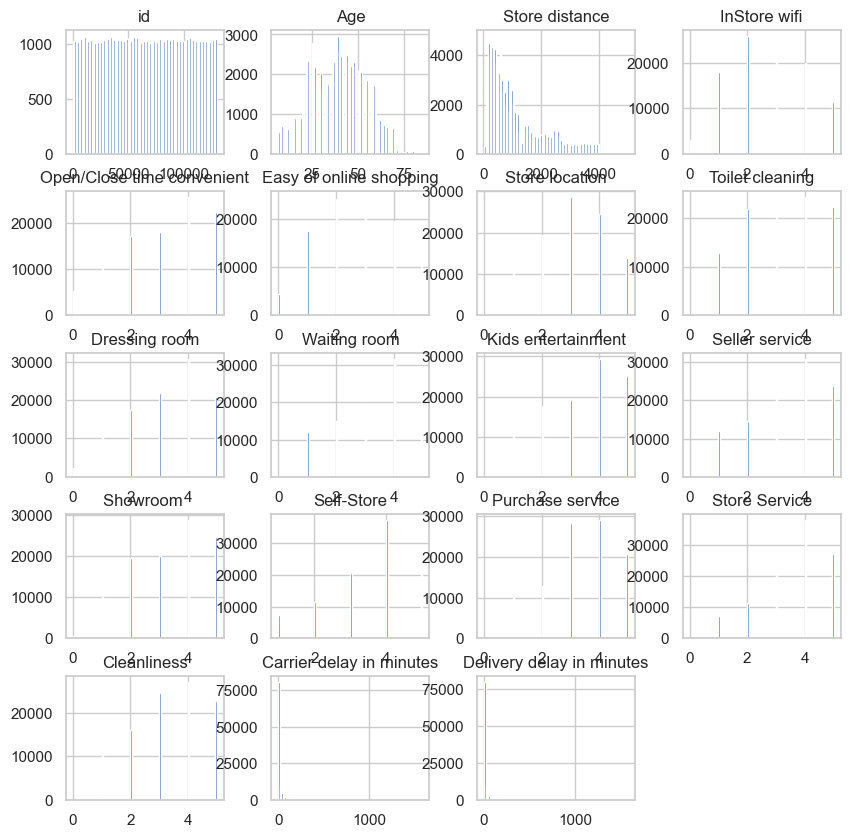

In [89]:
# Para visualizar a distribuição das variáveis numéricas, podemos utilizar o histograma

plt.rcParams['figure.figsize'] = [10,10]
num_attributes = df.select_dtypes( include= ['float64', 'int64'] )
num_attributes.hist( bins= 100);

## Rename columns

In [24]:
# df.rename(columns={'id', 'Gender', 'Customer Type', 'Age', 'Type of Purchase',
#        'Store size', 'Store distance', 'InStore wifi',
#        'Open/Close time convenient', 'Easy of online shopping',
#        'Store location', 'Toilet cleaning', 'Dressing room', 'Waiting room',
#        'Kids entertainment', 'Seller service', 'Showroom ', 'Self-Store',
#        'Purchase service', 'Store Service', 'Cleanliness',
#        'Carrier delay in minutes', 'Delivery delay in minutes',
#        'Satisfaction'})

## 1.3 Data Dimension

In [28]:
# verificando o tamanho do conjunto de dados
show_dimensions(df)

Number of rows: 103904
Number of columns: 24


### Dtypes

In [29]:
show_dtypes(df)

id                              int64
Gender                         object
Customer Type                  object
Age                             int64
Type of Purchase               object
Store size                     object
Store distance                  int64
InStore wifi                    int64
Open/Close time convenient      int64
Easy of online shopping         int64
Store location                  int64
Toilet cleaning                 int64
Dressing room                   int64
Waiting room                    int64
Kids entertainment              int64
Seller service                  int64
Showroom                        int64
Self-Store                      int64
Purchase service                int64
Store Service                   int64
Cleanliness                     int64
Carrier delay in minutes        int64
Delivery delay in minutes     float64
Satisfaction                   object
dtype: object


## 1.4 Check NaN 

In [30]:
# Verificando a presença de valores nulos
df.isna().sum()#/len(df)

id                              0
Gender                          0
Customer Type                   0
Age                             0
Type of Purchase                0
Store size                      0
Store distance                  0
InStore wifi                    0
Open/Close time convenient      0
Easy of online shopping         0
Store location                  0
Toilet cleaning                 0
Dressing room                   0
Waiting room                    0
Kids entertainment              0
Seller service                  0
Showroom                        0
Self-Store                      0
Purchase service                0
Store Service                   0
Cleanliness                     0
Carrier delay in minutes        0
Delivery delay in minutes     310
Satisfaction                    0
dtype: int64

### Fill drop Na

In [31]:
#df.dropna(inplace=True)
df['Delivery delay in minutes'] = df['Delivery delay in minutes'].apply(
    lambda x: 'nao_identificado' if pd.isnull(x) else x)

In [32]:
df.isna().sum()

id                            0
Gender                        0
Customer Type                 0
Age                           0
Type of Purchase              0
Store size                    0
Store distance                0
InStore wifi                  0
Open/Close time convenient    0
Easy of online shopping       0
Store location                0
Toilet cleaning               0
Dressing room                 0
Waiting room                  0
Kids entertainment            0
Seller service                0
Showroom                      0
Self-Store                    0
Purchase service              0
Store Service                 0
Cleanliness                   0
Carrier delay in minutes      0
Delivery delay in minutes     0
Satisfaction                  0
dtype: int64

In [37]:
# Verificar valores duplicados
df.duplicated().sum()

0

### Change Type

In [38]:
# df['Delivery delay in minutes'] = df['Delivery delay in minutes'].astype('int')

## 1.6. Data Balancing

In [39]:
# df[''].value_counts(normalize=True)


# EDA - Exploratory Data Analysis

In [69]:
df1 = df.copy()

In [77]:
import seaborn as sns


In [80]:
# import sweetviz as sv

# # Carregue seus dados em um DataFrame (df1)

# # Gere o relatório de análise exploratória
# report = sv.analyze(df1)

# # Visualize o relatório no navegador
# report.show_html('report.html')

In [79]:

sns.set(style="darkgrid")

# Plotando o gráfico de barras com a contagem
ax = sns.countplot(x="hotel_rating",
                   hue="tourism_agency_booking", data=df1)

# Adicionando o valor da contagem em cima de cada barra
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2., height+3,
            '{:.0f}'.format(height), ha="center")

plt.show()


ValueError: Could not interpret input 'hotel_rating'

## Multivariate Analysis

In [73]:
# Numerical Variables
plt.rcParams['figure.figsize'] = [5, 5]
num_attributes = df1.select_dtypes(include=['int64', 'float64'])
corr = num_attributes.corr(method='pearson')
sns.heatmap(corr, annot=True, fmt='.2f')


NameError: name 'sns' is not defined

In [72]:
# Categorical Variables
plt.rcParams['figure.figsize'] = [8,8]
cat_attributes = df1.select_dtypes(include='object')
lista=[]
for col in cat_attributes.columns:
    lista2 =[]
    for col2 in cat_attributes.columns:
        lista2.append(cramer_v(cat_attributes[col], cat_attributes[col2]))
    lista.append(lista2)
cramer = pd.DataFrame(lista,columns=cat_attributes.columns,index=cat_attributes.columns)
sns.heatmap(cramer,annot=True);

NameError: name 'sns' is not defined

In [ ]:
# Categorical Variables
plt.rcParams['figure.figsize'] = [8,8]
cat_attributes = df1.select_dtypes(include='object')
lista=[]
for col in cat_attributes.columns:
    lista2 =[]
    for col2 in cat_attributes.columns:
        lista2.append(cramer_v(cat_attributes[col], cat_attributes[col2]))
    lista.append(lista2)
cramer = pd.DataFrame(lista,columns=cat_attributes.columns,index=cat_attributes.columns)
sns.heatmap(cramer,annot=True);

(103904, 24)

In [42]:
# Limpeza de dados (opcional)
# Se necessário, realizar a limpeza dos dados de treinamento e teste
dados = dados.dropna()
dados = dados.drop_duplicates()



NameError: name 'dados' is not defined

In [ ]:
# Modelagem de dados
# Preparar os dados para modelagem, dividindo-os em atributos de entrada (X) e variável alvo (y)
X_treinamento = dados_treinamento.drop('Satisfacao', axis=1)
y_treinamento = dados_treinamento['Satisfacao']
X_teste = dados_teste.drop('Satisfacao', axis=1)
y_teste = dados_teste['Satisfacao']



In [ ]:
# Aplicação dos algoritmos de ML
# Escolher e aplicar um algoritmo de aprendizado de máquina, como regressão logística
modelo = LogisticRegression()
modelo.fit(X_treinamento, y_treinamento)



In [ ]:
# Avaliação de performance dos algoritmos
# Avaliar o desempenho do modelo utilizando métricas, como acurácia
y_pred = modelo.predict(X_teste)
acuracia = accuracy_score(y_teste, y_pred)
print("Acurácia do modelo:", acuracia)



In [ ]:
# Publicação do modelo em Produção
# Utilizar o modelo treinado para prever a satisfação de novos clientes em produção
novo_cliente = pd.DataFrame([[...]])  # Dados do novo cliente
satisfacao_pred = modelo.predict(novo_cliente)
print("Previsão de satisfação:", satisfacao_pred)

In [ ]:
# Entendimento de Negócio
# Faça uma análise detalhada do negócio, entenda as necessidades e requisitos, e identifique as variáveis relevantes para a análise.



In [ ]:
# Coleta de dados
# Carregue os dados relevantes em um DataFrame ou estrutura de dados adequada usando bibliotecas como pandas.
dados = pd.read_excel('caminho/do/arquivo.xlsx')



In [ ]:
# Limpeza de dados
# Realize a limpeza dos dados, como tratamento de valores ausentes, remoção de duplicatas ou correção de erros.
dados = dados.dropna()
dados = dados.drop_duplicates()



In [ ]:
# Exploração de dados
# Realize análises estatísticas, visualizações e gráficos para compreender a distribuição dos dados e identificar insights relevantes.
descricao = dados.describe()
plt.hist(dados['Coluna'])
plt.xlabel('Coluna')
plt.ylabel('Frequência')
plt.show()



In [ ]:
# Modelagem de dados
# Prepare os dados para modelagem, como transformação de variáveis categóricas em numéricas e divisão em conjunto de treinamento e teste.
X = dados.drop('Variavel_Resposta', axis=1)
y = dados['Variavel_Resposta']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [ ]:
# Aplicação dos algoritmos de ML
# Escolha e aplique os algoritmos de aprendizado de máquina adequados aos seus dados e objetivo, como regressão logística, árvores de decisão, etc.
modelo = LogisticRegression()
modelo.fit(X_train, y_train)



In [ ]:
# Avaliação de performance dos algoritmos
# Avalie a performance do modelo usando métricas apropriadas, como acurácia, precisão, recall, etc.
y_pred = modelo.predict(X_test)
acuracia = accuracy_score(y_test, y_pred)
print("Acurácia do modelo:", acuracia)



In [ ]:
# Publicação do modelo em Produção
# Implante o modelo treinado em produção, integrando-o a um sistema ou disponibilizando-o para uso conforme necessário.
# Isso pode envolver a criação de APIs, a implementação em uma plataforma ou a integração em um fluxo de trabalho existente.